## - MODELAGEM ESTÁTISTICA 

## - FATORES QUE INFLUENCIAM A RENDA PERCAPITA DOS MUNÍCIPIOS BRASILEIROS

- O objetivo do exercício é compreender os condicionantes da renda percapita dos múnicipios brasileiros a partir de variáveis como mortalidade infantil, analfabetismo, renda do munícipio e urbanização.

- O primeiro passo constitui na análise exploratória dos dados.
- O segundo passo constitui a elaboração da regressão linear.
- O terceiro passo constitui na verificação das hipóteses de regressão linear.



### PARA REALIZAR A ANÁLISE EXPLORATÓRIA SERÁ UTILIZADO UM NOVO PACOTE QUE DEVE SER INSTALADO PELO COMANDO ABAIXO:

In [48]:
! pip install plotly_express

In [49]:
import plotly_express as px

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns

from scipy import stats

import scipy

import seaborn as sns

import statsmodels

import statsmodels.stats.api as sms

In [101]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [102]:
df = pd.read_csv(r'C:\Users\Itamar\Desktop\analise_renda.csv',sep=';',decimal = ',')

In [103]:
pd.set_option('display.max_columns', None)  

In [104]:
df.head()

,sigla,codigo,municipio,mortalidade_infantil,pib,pop,analfabetismo,urbanizacao,pibpc,Unnamed: 9,Unnamed: 10
0,AC,1200013,Acrelândia,28.33,75641.45432,7935,26.691,0.441840,9.532634,NaN,NaN
1,AC,1200054,Assis Brasil,27.61,28164.54802,3490,29.046,0.616332,8.070071,NaN,NaN
2,AC,1200104,Brasiléia,30.71,90503.06502,17013,24.507,0.530535,5.319642,NaN,NaN
3,AC,1200138,Bujari,28.33,54942.54956,5826,38.770,0.279437,9.430578,NaN,NaN
4,AC,1200179,Capixaba,41.58,42746.16287,5206,37.717,0.292163,8.210942,NaN,NaN


In [105]:
x = df.groupby('sigla').size()

In [106]:
fig = px.histogram(df, x="sigla", color="sigla")
fig.show()

In [107]:
fig = px.box(df, y ='analfabetismo',x='sigla',color='sigla')
fig.show()

In [109]:
fig = px.scatter(df, x="analfabetismo", y="mortalidade_infantil", size="pibpc", color="sigla",size_max=20)
fig.show()

In [110]:
df = df.iloc[:,0:-2]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 9 columns):
sigla                   5507 non-null object
codigo                  5507 non-null int64
municipio               5507 non-null object
mortalidade_infantil    5507 non-null float64
pib                     5507 non-null float64
pop                     5507 non-null int64
analfabetismo           5507 non-null float64
urbanizacao             5507 non-null float64
pibpc                   5507 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 387.3+ KB


In [58]:
df.head()

,sigla,codigo,municipio,mortalidade_infantil,pib,pop,analfabetismo,urbanizacao,pibpc
0,AC,1200013,Acrelândia,28.33,75641.45432,7935,26.691,0.441840,9.532634
1,AC,1200054,Assis Brasil,27.61,28164.54802,3490,29.046,0.616332,8.070071
2,AC,1200104,Brasiléia,30.71,90503.06502,17013,24.507,0.530535,5.319642
3,AC,1200138,Bujari,28.33,54942.54956,5826,38.770,0.279437,9.430578
4,AC,1200179,Capixaba,41.58,42746.16287,5206,37.717,0.292163,8.210942


In [59]:
df.isnull().sum() 

sigla                   0
codigo                  0
municipio               0
mortalidade_infantil    0
pib                     0
pop                     0
analfabetismo           0
urbanizacao             0
pibpc                   0
dtype: int64

In [60]:
fig = px.box(df, y="mortalidade_infantil")
fig.show()

In [61]:
fig = px.box(df, y="analfabetismo")
fig.show()

In [62]:
regressao = smf.ols ('np.log(pibpc)~analfabetismo+urbanizacao+mortalidade_infantil', data = df).fit()

In [63]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(pibpc)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2171.
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:43:39   Log-Likelihood:                -3893.5
No. Observations:                5507   AIC:                             7795.
Df Residuals:                    5503   BIC:                             7821.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1993 

In [64]:
regressao.tvalues

Intercept               78.172310
analfabetismo          -31.508183
urbanizacao              9.418436
mortalidade_infantil   -10.686138
dtype: float64

In [65]:
print(regressao.resid)

0       0.951891
1       0.801888
2       0.290135
3       1.367170
4       1.282781
5       0.255148
6       0.363753
7       0.901289
8       1.749356
9       0.269778
10      0.888273
11      1.243476
12      0.428860
13      1.184294
14      0.156092
15      1.256783
16      1.651256
17      0.364681
18      0.684037
19      0.714666
20      0.486008
21      0.795605
22     -0.267489
23     -0.124284
24      0.181836
25      0.210675
26      0.022213
27      0.201271
28      0.234753
29     -0.264509
          ...   
5477    0.337613
5478    0.834612
5479   -0.268755
5480    0.555203
5481    0.367673
5482    0.394358
5483    0.736755
5484    0.844208
5485    0.227963
5486   -0.336327
5487    0.086311
5488   -0.127090
5489   -0.178367
5490    0.051437
5491    1.836235
5492   -0.156303
5493    0.117180
5494    0.358738
5495   -0.183619
5496    0.722608
5497    0.135041
5498    0.143289
5499    0.483135
5500    0.249331
5501   -0.321438
5502   -0.508373
5503    1.369127
5504    1.2207

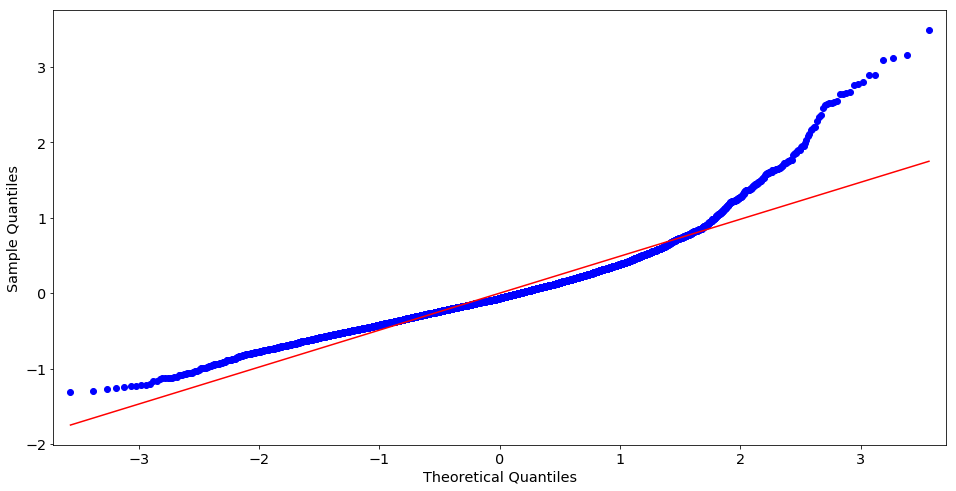

In [66]:
res = regressao.resid 
fig = sm.qqplot(res, line='s')
plt.show()

## TESTE DE HETERODECASTICIDADE 

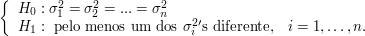

### Homocedasticidade ocorre quando a variância condicional dos erros aleatórios é igual para todas as observações.

A principal implicância da homocedasticidade é o fato dos intervalos de confiança e os testes t, F serem prejudicados.

In [67]:
from statsmodels.stats.diagnostic import het_breuschpagan

from statsmodels.stats.diagnostic import het_white


## RETORNO DA ESTÁTISTICA 

#### - lmfloat

Lagrange multiplier test statistic

#### - lmpvalfloat

p-value for Lagrange multiplier test

#### - fvalfloat

fstatistic for F test, alternative version of the same test based on F test for the parameter restriction

#### - fpvalfloat

pvalue for F test

In [68]:
white_test = het_white(regressao.resid, regressao.model.exog)

In [69]:
print(white_test)

(70.30797083107319, 1.3249892797354016e-11, 7.898653437397678, 1.1214728017926954e-11)


In [70]:
bp_test = het_breuschpagan(regressao.resid,regressao.model.exog)

In [71]:
print(bp_test)

(26.099338278793432, 9.091386084048949e-06, 8.734857487400493, 8.89446827740983e-06)


In [72]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test))) 
print(dict(zip(labels, bp_test)))

{'LM Statistic': 70.30797083107319, 'LM-Test p-value': 1.3249892797354016e-11, 'F-Statistic': 7.898653437397678, 'F-Test p-value': 1.1214728017926954e-11}
{'LM Statistic': 26.099338278793432, 'LM-Test p-value': 9.091386084048949e-06, 'F-Statistic': 8.734857487400493, 'F-Test p-value': 8.89446827740983e-06}


## AUTOCORRELAÇÃO ENTRE SERIAL ENTRE OS ERROS

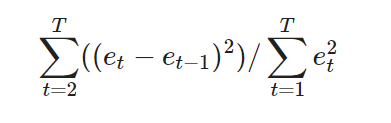

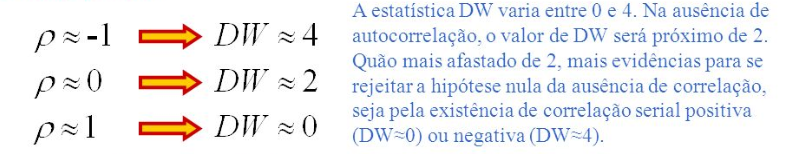

Imagem extraída:https://slideplayer.com.br/slide/7301344/24/images/15/Teste+de+Durbin-Watson.jpg

In [73]:
statsmodels.stats.stattools.durbin_watson(regressao.resid, axis=0)

1.8078255701787471

## TESTE BREUSCH GODFREY 

- CONSIDERA AUTOCORRELAÇÃO SERIAL ALÉM DE PRIMEIRA ORDEM.


## RETORNO DA ESTÁTISTICA 

#### - lmfloat

Lagrange multiplier test statistic

#### - lmpvalfloat

p-value for Lagrange multiplier test

#### - fvalfloat

fstatistic for F test, alternative version of the same test based on F test for the parameter restriction

#### - fpvalfloat

pvalue for F test

In [74]:
sm.stats.diagnostic.acorr_breusch_godfrey(regressao)

(378.05108722573436,
 9.424370960347047e-61,
 12.601981988579347,
 3.551373649821011e-63)

## TESTE DE NORMALIDADE DOS RÉSIDUOS 

## As hipóteses a serem testadas são:

#### H0: o erro do modelo de regressão linear possui distribuição normal.

#### H1: o erro do modelo de regressão linear possui distribuição não-normal.

### Jarque-Bera é um teste para testar se a série tem distribuição normal, baseada em diferenças entre assimetria e curtose da distribuição da série em relação a curva normal.

In [75]:
labels = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(regressao.resid)

print(dict(zip(labels, test))) 

{'Jarque-Bera': 7666.9348244531675, 'Chi^2 two-tail prob.': 0.0, 'Skew': 1.4487256478281072, 'Kurtosis': 8.001796248258096}


In [76]:
scipy.stats.jarque_bera(regressao.resid)

(7666.934824453172, 0.0)

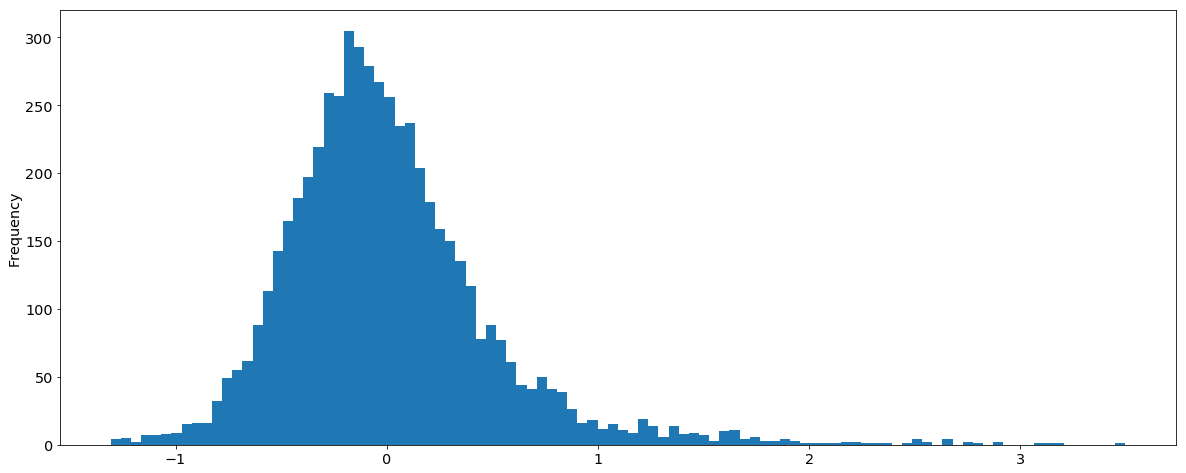

In [118]:
regressao.resid.plot.hist(bins=100)

## ALTERNATIVAS PARA MODELOS QUE VIOLAM AS HIPÓTESES DO MODELO DE MÍNIMOS QUADRADOS ORDINÁRIOS

In [77]:
df.head()

,sigla,codigo,municipio,mortalidade_infantil,pib,pop,analfabetismo,urbanizacao,pibpc
0,AC,1200013,Acrelândia,28.33,75641.45432,7935,26.691,0.441840,9.532634
1,AC,1200054,Assis Brasil,27.61,28164.54802,3490,29.046,0.616332,8.070071
2,AC,1200104,Brasiléia,30.71,90503.06502,17013,24.507,0.530535,5.319642
3,AC,1200138,Bujari,28.33,54942.54956,5826,38.770,0.279437,9.430578
4,AC,1200179,Capixaba,41.58,42746.16287,5206,37.717,0.292163,8.210942


O modelo de regressão linear dos mínimos quadrados ordinários apresentam propriedades favoráveis para quando todas as hipotéses dos modelos são atendidas. Contudo, pode-se alcançar resultados equivocados quando as premissas do modelo são violadas. Os métodos de estimação 'Robust Linear Regression' foram montados justamente para não serem afetados pela violaçõa dessas hipóteses. 

## MODO ERRADO PARA SELECIONAR NOSSAS VARIÁVEIS

In [78]:
endog = np.log(df['pibpc'])
exog = df['analfabetismo']+ df['mortalidade_infantil']+df['urbanizacao']

In [79]:
exog.head()

0    55.462840
1    57.272332
2    55.747535
3    67.379437
4    79.589163
dtype: float64

## MODO CORRETO PARA SELECIONAR AS VARÍAVEIS

In [80]:
endog = np.log(df['pibpc'])
exog = df.loc[:,('analfabetismo','mortalidade_infantil','urbanizacao')]

In [81]:
exog.head()

,analfabetismo,mortalidade_infantil,urbanizacao
0,26.691,28.33,0.441840
1,29.046,27.61,0.616332
2,24.507,30.71,0.530535
3,38.770,28.33,0.279437
4,37.717,41.58,0.292163


In [93]:
exog = sm.add_constant(exog)

In [94]:
regressao_ajustada = statsmodels.robust.robust_linear_model.RLM(endog, exog).fit()

In [95]:
print(regressao_ajustada.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  pibpc   No. Observations:                 5507
Model:                            RLM   Df Residuals:                     5503
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 13 Oct 2019                                         
Time:                        20:52:46                                         
No. Iterations:                    18                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1805 

In [96]:
regressao_ajustada.resid

0       0.995456
1       0.857991
2       0.335093
3       1.411368
4       1.316268
5       0.304889
6       0.418035
7       0.961561
8       1.796112
9       0.318951
10      0.948315
11      1.286787
12      0.473722
13      1.228666
14      0.214181
15      1.303292
16      1.696979
17      0.409843
18      0.741952
19      0.772387
20      0.535773
21      0.826058
22     -0.234748
23     -0.077429
24      0.234795
25      0.261733
26      0.089856
27      0.265006
28      0.285231
29     -0.231476
          ...   
5477    0.374369
5478    0.855098
5479   -0.247169
5480    0.585630
5481    0.398015
5482    0.433951
5483    0.749607
5484    0.861878
5485    0.261350
5486   -0.301453
5487    0.093286
5488   -0.106403
5489   -0.177338
5490    0.054747
5491    1.860035
5492   -0.117800
5493    0.143723
5494    0.394297
5495   -0.170966
5496    0.775499
5497    0.175977
5498    0.191248
5499    0.520152
5500    0.299757
5501   -0.298360
5502   -0.459186
5503    1.380951
5504    1.2516